# Predicting If A Player Will Be Drafted

This notebook uses machine learning to predict whether or not a player will be drafted in the NFL draft based on their
NFL combine drill scores.

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
import warnings
warnings.filterwarnings('ignore')
import ipywidgets as widgets
import seaborn as sns
import colorama
from colorama import Fore, Style

## Loading the Data

In [2]:
X = pd.read_csv("NFL.csv")

In [3]:
X.shape 

(3477, 18)

In [4]:
X.head()

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,Yes
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,Yes
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,Yes
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,Yes
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,Yes


# Data Statistics

In [5]:
X.describe()

,Year,Age,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,BMI
count,3477.000000,2927.000000,3477.000000,3477.000000,3303.000000,2780.000000,2572.000000,2749.000000,2260.000000,2337.000000,3477.000000
mean,2013.823699,21.983259,1.873968,109.746393,4.769080,83.392403,20.241058,291.629698,7.237416,4.403843,31.074417
std,3.075616,0.969490,0.067494,20.483780,0.301477,10.678403,6.497600,23.960879,0.410230,0.265224,4.438279
min,2009.000000,18.000000,1.651000,67.585263,4.220000,44.450000,2.000000,198.120000,6.280000,3.810000,21.609798
25%,2011.000000,21.000000,1.828800,92.986436,4.530000,76.200000,15.000000,276.860000,6.940000,4.200000,27.475641
50%,2014.000000,22.000000,1.879600,104.779837,4.690000,83.820000,20.000000,294.640000,7.140000,4.360000,30.122626
75%,2016.000000,23.000000,1.930400,125.645087,4.960000,90.170000,25.000000,307.340000,7.490000,4.560000,34.038647
max,2019.000000,28.000000,2.082800,167.375585,6.000000,114.300000,49.000000,373.380000,9.040000,5.560000,44.680097


### Datatypes

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3477 entries, 0 to 3476
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 3477 non-null   int64  
 1   Player               3477 non-null   object 
 2   Age                  2927 non-null   float64
 3   School               3477 non-null   object 
 4   Height               3477 non-null   float64
 5   Weight               3477 non-null   float64
 6   Sprint_40yd          3303 non-null   float64
 7   Vertical_Jump        2780 non-null   float64
 8   Bench_Press_Reps     2572 non-null   float64
 9   Broad_Jump           2749 non-null   float64
 10  Agility_3cone        2260 non-null   float64
 11  Shuttle              2337 non-null   float64
 12  Drafted..tm.rnd.yr.  2254 non-null   object 
 13  BMI                  3477 non-null   float64
 14  Player_Type          3477 non-null   object 
 15  Position_Type        3477 non-null   o

### Drafted vs Not Drafted Bar Graph of all players

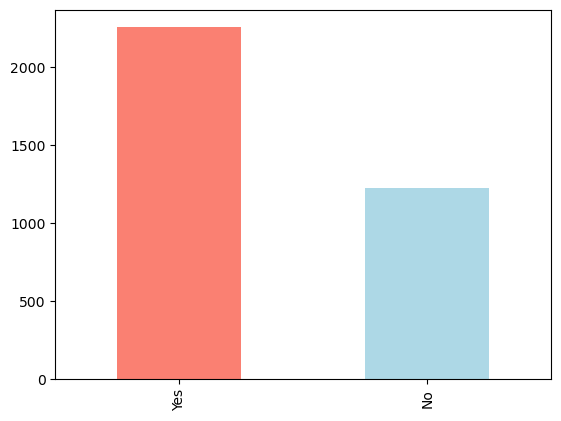

In [7]:
X["Drafted"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

### Drafted vs Undrafted By Position Bar Graph

<AxesSubplot:xlabel='Position_Type'>

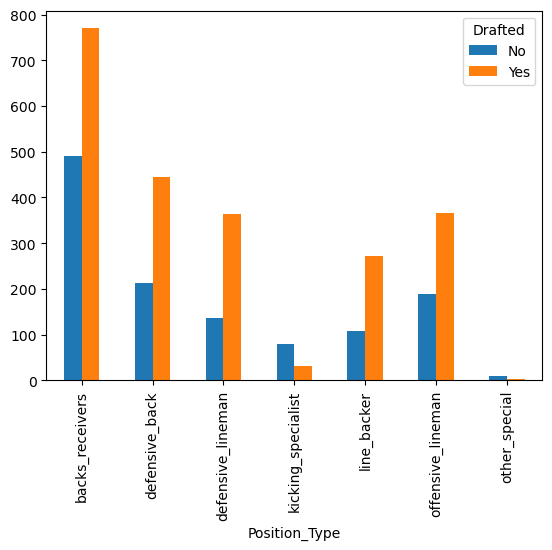

In [8]:
pd.crosstab(X.Position_Type, X.Drafted).plot(kind='bar')

# Data Cleaning

### Attribute Correlation Matrix

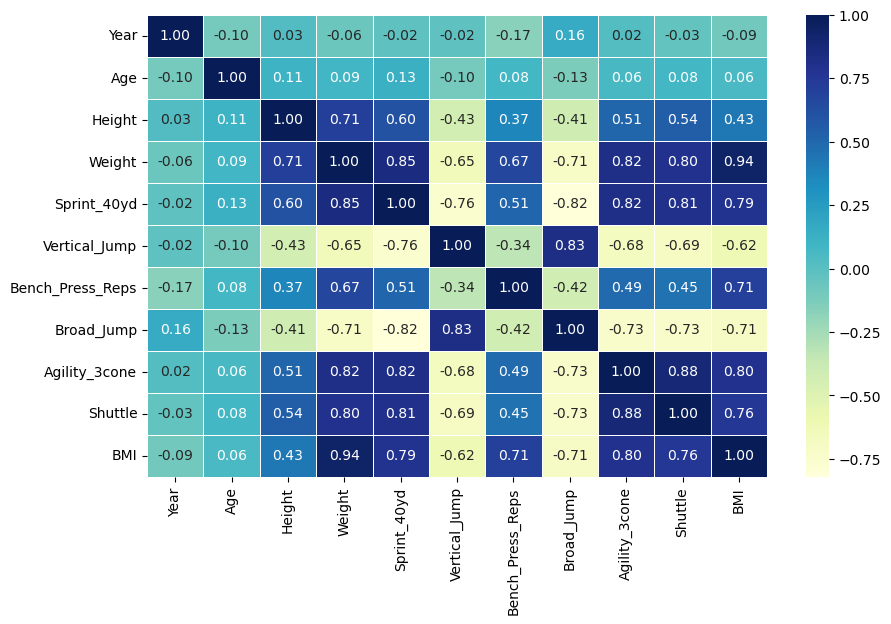

In [9]:
corr_matrix = X.corr()
fig, ax = plt.subplots(figsize=(10,6
                                    ))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [10]:
# Removing columns that will not be included in the model.
X.drop("Player", inplace=True, axis=1);
X.drop("School", inplace=True, axis=1);
X.drop("Drafted..tm.rnd.yr.", inplace=True,  axis=1);
X.drop("Player_Type", inplace=True,  axis=1);
X.drop("Position", inplace=True,  axis=1);
X.drop("Year", inplace=True,  axis=1);
X.drop("BMI", inplace=True,  axis=1)
X.head()

,Age,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Position_Type,Drafted
0,20.0,1.8542,106.594207,4.38,85.09,25.0,325.12,NaN,NaN,backs_receivers,Yes
1,22.0,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,defensive_lineman,Yes
2,24.0,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,offensive_lineman,Yes
3,23.0,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,defensive_back,Yes
4,22.0,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,line_backer,Yes


# Data Formatting 

In [11]:
dummies = pd.get_dummies(X[["Position_Type"]]) # Creates columns for every position type. These columns accept binary inputs. 1 = player is that position
dummies

,Position_Type_backs_receivers,Position_Type_defensive_back,Position_Type_defensive_lineman,Position_Type_kicking_specialist,Position_Type_line_backer,Position_Type_offensive_lineman,Position_Type_other_special
0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
3472,0,1,0,0,0,0,0
3473,0,1,0,0,0,0,0
3474,0,1,0,0,0,0,0
3475,0,1,0,0,0,0,0


In [12]:
dropped_x = X.dropna(axis=0) # Assign dropped_x as X without all rows containing NaN values

In [13]:
y = dropped_x["Drafted"] # Assign Y to hold the Drafted results of X
y

1       Yes
3       Yes
4       Yes
7       Yes
8       Yes
       ... 
3423     No
3429     No
3434     No
3439     No
3448     No
Name: Drafted, Length: 1497, dtype: object

In [14]:
dropped_x.drop("Drafted", inplace=True,  axis=1); # Removes the Drafted column from X.dropped
finished_x = pd.concat([dropped_x, dummies], axis=1, join="inner") # Finished_x combines the dummies and the dropped_x dataframes
finished_x.drop("Position_Type", inplace=True,  axis=1); # Removed because dummies split this column into 5 columns 
finished_x.reset_index(drop=True, inplace=True) # Fixes the gaps in the indexes
y.reset_index(drop=True, inplace=True) # Fixes the gaps in the indexes
finished_x

,Age,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Position_Type_backs_receivers,Position_Type_defensive_back,Position_Type_defensive_lineman,Position_Type_kicking_specialist,Position_Type_line_backer,Position_Type_offensive_lineman,Position_Type_other_special
0,22.0,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,0,0,1,0,0,0,0
1,23.0,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,0,1,0,0,0,0,0
2,22.0,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,0,0,0,0,1,0,0
3,21.0,2.0320,140.160042,5.32,55.88,19.0,238.76,7.87,4.88,0,0,0,0,0,1,0
4,23.0,1.8796,120.655570,4.53,88.90,28.0,304.80,7.46,4.43,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,23.0,1.8542,86.636143,4.60,91.44,9.0,307.34,6.70,4.15,0,1,0,0,0,0,0
1493,22.0,1.9304,109.315761,5.00,87.63,16.0,299.72,7.56,4.55,0,0,0,0,0,0,1
1494,22.0,1.9558,102.965468,4.45,93.98,8.0,312.42,7.25,4.59,1,0,0,0,0,0,0
1495,21.0,1.8034,86.182550,4.64,85.09,16.0,294.64,6.89,4.09,0,1,0,0,0,0,0


# Model Training & Scoring

In [15]:
X_train, X_test, y_train, y_test = train_test_split(finished_x,
                                                    y,
                                                    test_size=0.20) # Splits the data into training and testing
clf = LogisticRegression(solver='lbfgs', max_iter=10000) # Logistic Regression algorithm instantiation
clf.fit(X_train, y_train) # To train the model
clf.score(X_test, y_test) # To score/test the model. The output is the accuracy of the algorithm. 

0.7966666666666666

# Creating the User Interface

In [16]:
# Creation of the height for the user interface
age_widget = widgets.IntSlider(
    min=20,
    max=30,
    step=1,
    description='Age:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

In [17]:
# Creation of the height slider for the user interface
height_widget = widgets.IntSlider(
    min=60,
    max=90,
    step=1,
    description='Height(Inch):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

In [18]:
# Creation of the weight slider for the user interface
weight_widget = widgets.IntSlider(
    min=150,
    max=400,
    step=1,
    description='Weight(lb):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

In [19]:
# Creation of the 40 yd dash slider for the user interface
sprint_40yd_widget = widgets.FloatSlider(
    min=4,
    max=6.5,
    step=0.1,
    description='40yd(Sec):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

In [20]:
# Creation of the vertical jump slider for the user interface
vertical_jump_widget = widgets.IntSlider(
    min=5,
    max=55,
    step=1,
    description='VJump(Inch):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

In [21]:
# Creation of the bench press slider for the user interface
bench_press_reps_widget = widgets.IntSlider(
    min=0,
    max=60,
    step=1,
    description='Bench(Reps)',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

In [22]:
# Creation of the broad jump slider for the user interface
broad_jump_widget = widgets.IntSlider(
    min=60,
    max=180,
    step=1,
    description='BJump(Inch)',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

In [23]:
# Creation of the 3 cone slider for the user interface
agility_3cone_widget = widgets.FloatSlider(
    min=6,
    max=8,
    step=0.1,
    description='3Cone(Sec)',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

In [24]:
# Creation of the shuttle(20 yd dash) slider for the user interface
shuttle_widget = widgets.FloatSlider(
    min=3.5,
    max=5.5,
    step=0.1,
    description='20yd(Sec):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

In [25]:
# Creation of the position group dropdown box for the user interface
position_group_widget = widgets.Dropdown(
    options=['Receiver', 'Defensive Back', 'Defensive Line', 'Kicking Specialist', 'Linebacker', 'Offensive Line', 'Other'],
    value='Receiver', #Default Value
    description='Position:',
    disabled=False,
)       

In [26]:
# Creation of the Simulate Draft Button
simulate_button = widgets.Button(description='Simulate Draft') 
out = widgets.Output() 

def on_simulate_button_clicked(_):
    # Input for the ML Algorithm. These will change to 1 if selected by the user in the drop down box.
    receiver = 0
    defensive_back = 0
    defensive_line = 0
    kicking_specialist = 0
    linebacker = 0
    offensive_line = 0
    other = 0
    position = ""  # Used to filter the generated chart by the position group slider
    if (position_group_widget.value == 'Receiver'):
        receiver = 1 
        position = "backs_receivers" 
    elif (position_group_widget.value == 'Defensive Back'):
        defensive_back = 1
        position = "defensive_back"
    elif (position_group_widget.value == 'Defensive Line'):
        defensive_line = 1
        position = "defensive_lineman"
    elif (position_group_widget.value == 'Kicking Specialist'):
        kicking_specialist = 1
        position = "kicking_specialist"
    elif (position_group_widget.value == 'Linebacker'):
        linebacker = 1
        position = "line_backer"
    elif (position_group_widget.value == 'Offensive Line'):
        offensive_line = 1
        position = "offensive_lineman"
    elif (position_group_widget.value == 'Other'):
        other = 1
        position = "other_special"
        
    # Getting user input from widgets
    shuttle = float(shuttle_widget.value) # Shuttle = 20yd Slider
    agility_3cone = float(agility_3cone_widget.value)
    broad_jump = int(broad_jump_widget.value) * 2.54 # Converted to CM from inches for consistency with model data
    bench_press_reps = int(bench_press_reps_widget.value)
    vertical_jump = int(vertical_jump_widget.value) * 2.54 # Converted to CM from inches for consistency with model data
    sprint_40yd = float(sprint_40yd_widget.value)
    weight = int(weight_widget.value) / 2.205 # Converted to KG from pounds for consistency with model data
    height = int(height_widget.value) / 39.37 # Converted to meters from inches for consistency with model data
    age = int(age_widget.value)
    
    # Creating a dataframe with all drafted players with the user's selected position group(from UI dropbox)
    # Scatter plots will be drawn from this dataframe
    chartsdf = X.loc[(X['Drafted'] == 'Yes') & (X['Position_Type'] == position)]
    chartsdf['Weight_Pounds'] = chartsdf['Weight'] * 2.205 # Converting from KG to pounds for better visualization for user
    chartsdf['Vertical_Jump_Inches'] = chartsdf['Vertical_Jump'] / 2.54 # Converting from cm to inches
    chartsdf['Broad_Jump_Inches'] = chartsdf['Broad_Jump'] / 2.54 # Converting from cm to inches
    chartsdf['Height_Inches'] = chartsdf['Height'] * 39.37 # Converting from meters to inches
    
    # Scatter Charts Comparing Input vs Drafted Players
    fig, axs = plt.subplots(2, 2, figsize=(15, 10)) 
    fig.suptitle('How You Compare To Drafted Players From Your Position Group', fontsize=16)
    
    #Top Left Chart Comparing Weight and 40 Yard Times
    axs[0, 0].set_title('Weight & 40 Yard Times')
    axs[0, 0].set_xlabel('Weight') 
    axs[0, 0].set_ylabel('40 Yard Dash(S)') 
    axs[0, 0].scatter(chartsdf.Weight_Pounds,
                      chartsdf.Sprint_40yd)
    axs[0, 0].scatter(int(weight_widget.value),
                      sprint_40yd,
                      c="red")
    axs[0, 0].legend(('Drafted','You'))
    
    #Top Right Chart Comparing Weight and Vertical Jump
    axs[0, 1].set_title('Weight & Vertical Jump')
    axs[0, 1].set_xlabel('Weight') 
    axs[0, 1].set_ylabel('Vertical Jump')
    axs[0, 1].scatter(chartsdf.Weight_Pounds,
                      chartsdf.Vertical_Jump_Inches)
    axs[0, 1].scatter(int(weight_widget.value),
                      int(vertical_jump_widget.value),
                      c="red")
    axs[0, 1].legend(('Drafted','You'))
    
    #Bottom left Chart Comparing Weight and Bench Press
    axs[1, 0].set_title('Weight & Bench Press')
    axs[1, 0].set_xlabel('Weight') 
    axs[1, 0].set_ylabel('Bench Press(Reps at 225)') 
    axs[1, 0].scatter(chartsdf.Weight_Pounds,
                      chartsdf.Bench_Press_Reps)
    axs[1, 0].scatter(int(weight_widget.value),
                      bench_press_reps,
                      c="red")
    axs[1, 0].legend(('Drafted','You'))
    
    #Bottom Right Chart Comparing Height and Broad Jump
    axs[1, 1].set_title('Height & Broad Jump')
    axs[1, 1].set_xlabel('Height(Inches)') 
    axs[1, 1].set_ylabel('Broad Jump') 
    axs[1, 1].scatter(chartsdf.Height_Inches,
                      chartsdf.Broad_Jump_Inches)
    axs[1, 1].scatter(int(height_widget.value),
                      int(broad_jump_widget.value),
                      c="red")
    axs[1, 1].legend(('Drafted','You'))
    
    # Prediction with our model
    prediction = clf.predict([[age, height, weight, sprint_40yd, vertical_jump, bench_press_reps, broad_jump, agility_3cone,shuttle, receiver, defensive_back , defensive_line , kicking_specialist, linebacker, offensive_line, other]])
    
    # Output
    with out:
        out.clear_output()
        if (prediction == 'Yes'):
            print(Fore.GREEN + 'You will be drafted')
            plt.show()
        else:
            print(Fore.RED + 'You will not be drafted')
            plt.show()



# User Interface
### Adjust the widgets, then click "Simulate Draft" to run!

In [27]:
# Aligning the UI
widget_vbox = widgets.VBox([age_widget, sprint_40yd_widget, bench_press_reps_widget, agility_3cone_widget, shuttle_widget, weight_widget, height_widget, vertical_jump_widget, broad_jump_widget, position_group_widget])
simulate_button.on_click(on_simulate_button_clicked) #Button functionality when clicked
widgets.VBox([widget_vbox, simulate_button ,out]) 